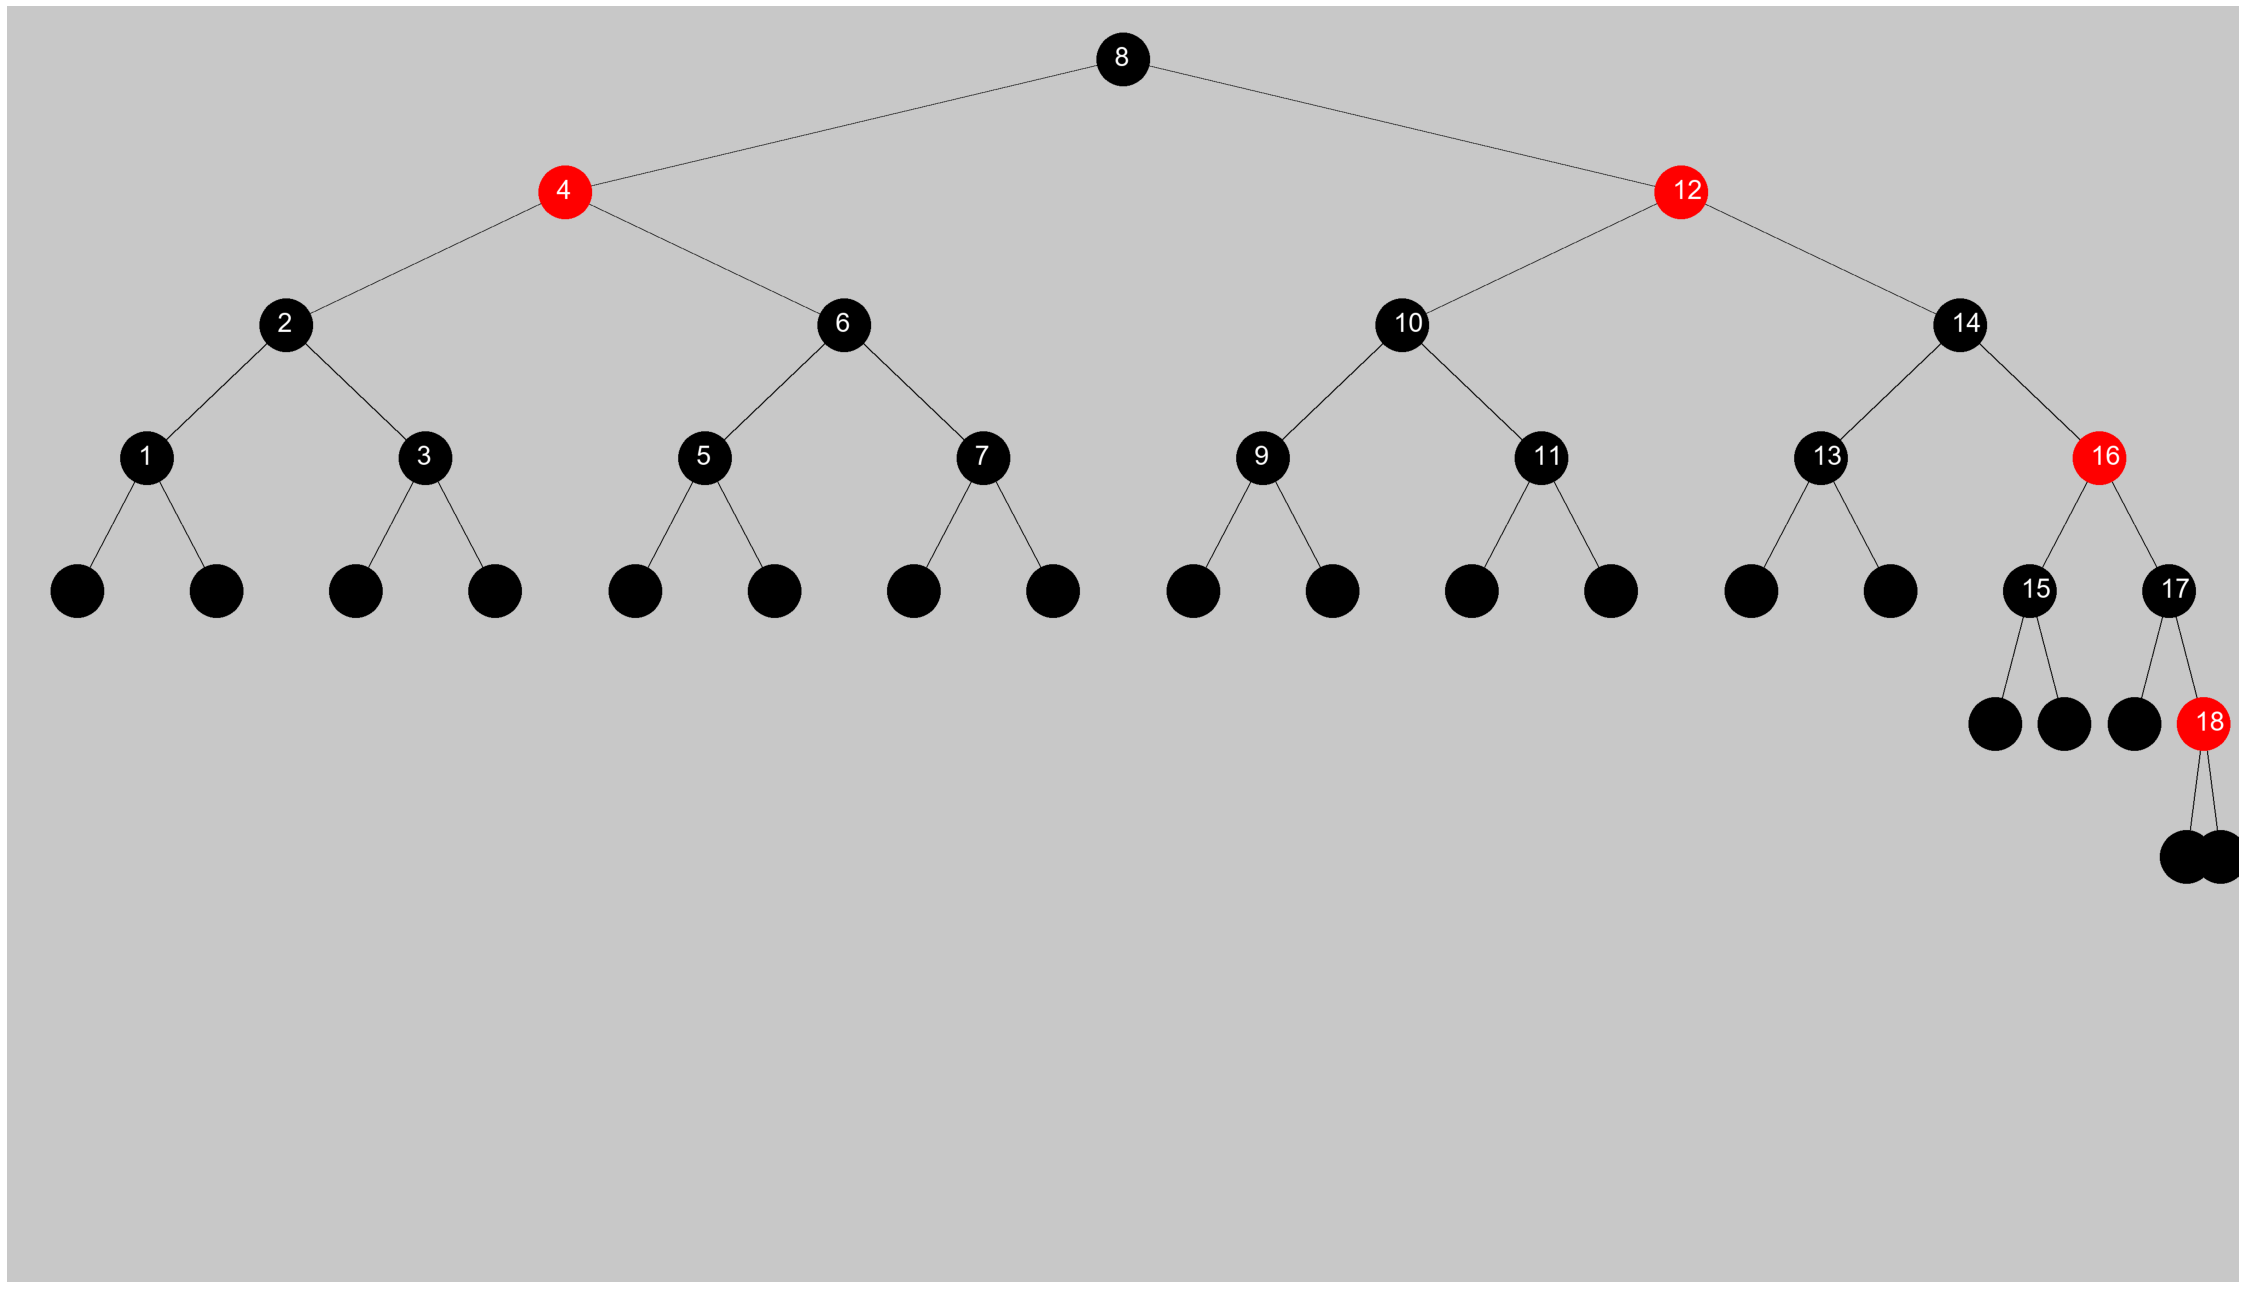

In [7]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

Colour = Enum('Colour', 'BLACK RED')

class Node:
    
    empty = 1
    
    def __init__(self, data):
        if data:
            if self.empty:
                self.empty = 0
                self.parent = Node(None)
                self.colour = Colour.BLACK
            else:
                self.parent = None
                self.colour = Colour.RED
            self.left = Node(None)
            self.right = Node(None)
            self.left.parent = self
            self.right.parent = self
            self.data = data
        else:
            self.parent = None
            self.left = None
            self.right = None
            self.colour = Colour.BLACK
            self.data = None
        
        
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()
        

    def Insert(self, data):
        if self.data:
            if data <= self.data:
                self.left.Insert(data)
            else:
                self.right.Insert(data)
        else:
            self.data = data
            self.left = Node(None)
            self.right = Node(None)
            self.left.parent = self
            self.right.parent = self
            if self.parent:
                self.colour = Colour.RED
            else:
                self.colour = Colour.BLACK
            self.InsertFixup()
        
    def LeftRotate(self):
        y = self.right
        if self.parent.data == None:
            self.data, y.data = y.data, self.data
            self.colour, y.colour = y.colour, self.colour
            self.right = y.right
            self.right.parent = self
            y.right = y.left
            y.right.parent = y
            y.left = self.left
            y.left.parent = y
            self.left = y
            self.left.parent = self
        else:
            self.right = y.left
            y.left.parent = self
            y.parent = self.parent
            if self == self.parent.left:
                self.parent.left = y
            else:
                self.parent.right = y
            y.left = self
            self.parent = y
            
            
    def RightRotate(self):
        y = self.left
        if self.parent.data == None:
            self.data, y.data = y.data, self.data
            self.colour, y.colour = y.colour, self.colour
            self.left = y.left
            self.left.parent = self
            y.left = y.right
            y.left.parent = y
            y.right = self.left
            y.right.parent = y
            self.right = y
            self.right.parent = self
        else:
            self.left = y.right
            y.right.parent = self
            y.parent = self.parent
            if self== self.parent.left:
                self.parent.left = y
            else:
                self.parent.right = y
            y.right = self
            self.parent = y
         
    def InsertFixup(self):
        while self.parent.colour == Colour.RED:
            if self.parent == self.parent.parent.left:
                y = self.parent.parent.right
                if y.colour == Colour.RED:
                    self.parent.colour = Colour.BLACK
                    y.colour = Colour.BLACK
                    self.parent.parent.colour = Colour.RED
                    self = self.parent.parent
                else:
                    if self == self.parent.right:
                        self = self.parent
                        self.LeftRotate()
                    self.parent.colour = Colour.BLACK
                    self.parent.parent.colour = Colour.RED
                    self.parent.parent.RightRotate()
                
            else:
                y = self.parent.parent.left
                if y.colour == Colour.RED:
                    self.parent.colour = Colour.BLACK
                    y.colour = Colour.BLACK
                    self.parent.parent.colour = Colour.RED
                    self = self.parent.parent
                else:
                    if self == self.parent.left:
                        self = self.parent
                        self.RightRotate()
                    self.parent.colour = Colour.BLACK
                    self.parent.parent.colour = Colour.RED
                    self.parent.parent.LeftRotate()
        if self.parent.data == None:
            if self.colour == Colour.RED:
                self.colour = Colour.BLACK
        
                
    
            
    def InsertList(self,lst):
        for i in lst:
            self.Insert(i)

            
    def DrawNode(self,r,sizeX,sizeY,img,d,f,currentLevel,currentX,currentY):
        
        if self.left:
            d.line([(currentX, currentY) , (currentX - sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.left.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX - sizeX//(2**currentLevel),currentY + 5 * r)
        if self.right:
            d.line([(currentX, currentY) , (currentX + sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.right.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX + sizeX//(2**currentLevel),currentY + 5 * r)
            
        if self.colour == Colour.BLACK:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
        else:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (255,0,0),fill = (255,0,0), width = 1)
            
        if self.data:
            d.text((currentX-r//3,currentY-2*r//3),str(self.data), fill=(255,255,255), font = f)
        
        
    def DrawTree(self,name):
        currentLevel = 1
        r = 50
        sizeX = 4200
        sizeY = 2400
        img = Image.new('RGB', (sizeX, sizeY), color = (200,200,200))
        d = ImageDraw.Draw(img)
        f = ImageFont.truetype("arial.ttf", r)
        
        currentX, currentY = sizeX//2, 2*r
        self.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX,currentY)
        
        img.save(name)
        
    def TreeSearch(self,n):
        if self.data == None:
            return None
        if n == self.data:
            return self
        elif n < self.data:
            if self.left:
                return self.left.TreeSearch(n)
            else:
                return None
        elif n > self.data:
            if self.right:
                return self.right.TreeSearch(n)
            else:
                return None

        



def ShowImage():
    root.DrawTree('pil.png')
    pil_im = Image.open('pil.png', 'r')
    plt.figure().set_size_inches(40,100)
    plt.imshow(np.asarray(pil_im))
    plt.axis('off')
    plt.show()
    pil_im.close()


#root = Node(32)
#root.InsertList([16,48,8,24,23,22,21])
root = Node(1)
root.InsertList([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
ShowImage()









    